In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf /content/IDA_2023ICLR
!git clone https://github.com/yu-gi-oh-leilei/IDA_2023ICLR.git /content/IDA_2023ICLR


Cloning into '/content/IDA_2023ICLR'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 154 (delta 49), reused 141 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (154/154), 929.48 KiB | 2.90 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
!ls

drive  IDA_2023ICLR  sample_data


In [ ]:
cd /content/drive/MyDrive/IDA_2023ICLR-main

/content/drive/MyDrive/IDA_2023ICLR-main


In [ ]:
!ls

all_lib     COCO2014_1	COCO2014c	  images	  __pycache__	    scripts
checkpoint  COCO2014a	COCO2014_new	  _init_paths.py  README.md
COCO2014    COCO2014b	COCO2014_new_new  main_mlc.py	  requirements.txt


In [ ]:
!pip install -r requirements.txt -q
!pip install fiftyone -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 50.1 MB/s eta 0:00:0

In [ ]:
!pip install timm==0.6.5
!pip uninstall tensorflow -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.8/512.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.11
    Uninstalling timm-1.0.11:
      Successfully uninstalled timm-1.0.11
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!ls /content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/

annotations  label_npy	test2014  train2014  val2014


In [ ]:
!sed -i 's/np.int/int/g' /usr/local/lib/python3.10/dist-packages/randaugment/randaugment.py


In [ ]:
!torchrun --nnodes=1 --nproc_per_node=1 main_mlc.py -a 'IDA-R101-448' \
--dataset_dir '/content/drive/MyDrive/IDA_2023ICLR-main/' \
--backbone resnet101 --dataname coco14 --batch-size 32 --print-freq 400 \
--output './checkpoint/IDA/ResNet_448_MSCOCO14/bce_attention_bs128_work2' \
--world-size 1 --rank 0 \
--gamma_pos 0 --gamma_neg 0 --dtgfl --loss_clip 0 \
--epochs 80 --lr 1e-4 --optim Adam_twd --pretrained \
--num_class 5 --img_size 448 --weight-decay 1e-4 \
--cutout --n_holes 1 --cut_fact 0.5 --length 224 \
--nheads 4 --use_intervention --heavy \
--early-stop \
--use_BN \
--ema-decay 0.9997 --amp \
--seed 1 \
--lr_scheduler OneCycleLR \
--pattern_parameters add_weight


world size: 1, world rank: 0, local rank: 0
os.environ: environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '12.2.5.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '12.2.140-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.19.3-1+cuda12.2', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.19.3-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': '9b13e2cec0cf', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'COLAB_TPU_1VM': '', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=ti

In [ ]:
!torchrun --nnodes=1 --nproc_per_node=1 main_mlc.py -a 'IDA-R101-448' \
--dataset_dir '/content/drive/MyDrive/IDA_2023ICLR-main/' \
--backbone resnet101 --dataname coco14 --batch-size 48 --print-freq 400 \
--output './checkpoint/IDA/ResNet_448_MSCOCO14/bce_attention_bs128_work2' \
--world-size 1 --rank 0 \
--gamma_pos 0 --gamma_neg 0 --dtgfl --loss_clip 0 \
--epochs 30 --lr 1e-4 --optim Adam_twd --pretrained \
--num_class 5 --img_size 448 --weight-decay 1e-4 \
--cutout --n_holes 1 --cut_fact 0.5 --length 224 \
--nheads 4 --use_intervention --heavy \
--early-stop \
--use_BN \
--ema-decay 0.9997 --amp \
--seed 1 \
--lr_scheduler OneCycleLR \
--pattern_parameters add_weight


world size: 1, world rank: 0, local rank: 0
os.environ: environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '12.2.5.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '12.2.140-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.19.3-1+cuda12.2', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.19.3-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': '9b13e2cec0cf', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'COLAB_TPU_1VM': '', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=ti

In [ ]:
import json
import os

def filter_annotations(annotations_file, image_dir, output_file):
    with open(annotations_file, 'r') as f:
        coco_data = json.load(f)

    # Get the file names of the images in the dataset
    available_images = set(os.listdir(image_dir))

    # Filter images
    filtered_images = [img for img in coco_data['images'] if img['file_name'] in available_images]
    image_ids = {img['id'] for img in filtered_images}

    # Filter annotations
    filtered_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] in image_ids]

    # Save the filtered annotations
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    with open(output_file, 'w') as f:
        json.dump(coco_data, f)

# Filter training annotations
filter_annotations('/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/annotations/instances_train2014.json',
                   '/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/train2014/',
                   '/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/annotations/instances_train2014_filtered.json')

# Filter validation annotations
filter_annotations('/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/annotations/instances_val2014.json',
                   '/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/val2014/',
                   '/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/annotations/instances_val2014_filtered.json')


In [ ]:
import os

folder_path = "/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/train2014"

files = os.listdir(folder_path)


image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']  # Add other image extensions as needed
images = [file for file in files if os.path.splitext(file)[1].lower() in image_extensions]

num_images = len(images)

print(f"There are {num_images} image files in the folder.")


There are 223 image files in the folder.


In [ ]:
!pip install addict


In [ ]:
!pip install yapf

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/IDA_2023ICLR-main/all_lib/lib_org_backbone/dataset')

import torch
from torchvision import transforms
import numpy as np
from cocodataset import CoCoDataset
from models.IDAttention import build_ida
import matplotlib.pyplot as plt
from PIL import Image
from models.IDAttention import IDA, resnet101_backbone

# Set paths
trained_model_path = "/content/drive/MyDrive/IDA_2023ICLR-main/checkpoint/IDA/ResNet_448_MSCOCO14/bce_attention_bs128_work2/model_best.pth.tar"
test_images_dir = "/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/test2014"
test_annotation_path = "/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/annotations/instances_test2014.json"
test_label_vectors_path = "/content/drive/MyDrive/IDA_2023ICLR-main/COCO2014/label_npy/test_label_vectors_coco14.npy"

class Args:
    backbone = "resnet101"
    num_class = 5
    use_intervention = True
    nheads = 4
    heavy = True
    keep_input_proj = False

args = Args()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = build_ida(args).to(device)
state_dict = torch.load(trained_model_path, map_location=device)["state_dict"]
model.load_state_dict(state_dict)
model.eval()


transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor()
])


test_dataset = CoCoDataset(
    image_dir=test_images_dir,
    anno_path=test_annotation_path,
    input_transform=transform,
    labels_path=test_label_vectors_path
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# mAP
def calculate_mAP(y_true, y_pred):
    from sklearn.metrics import average_precision_score
    aps = [average_precision_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    return np.mean(aps)

# Evaluation
all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        logits, _ = model(images)
        preds = torch.sigmoid(logits).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(labels.cpu().numpy())

all_preds = np.vstack(all_preds)
all_labels = np.vstack(all_labels)

# Calculate mAP
mAP_score = calculate_mAP(all_labels, all_preds)
print(f"Mean Average Precision (mAP) on the test set: {mAP_score:.4f}")


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 154MB/s]


use intervention
use heavy
set model.input_proj to Indentify!


<ipython-input-13-733ad5a7969a>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(trained_model_path, map_location=device)["state_dict"]


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Mean Average Precision (mAP) on the test set: 0.3587


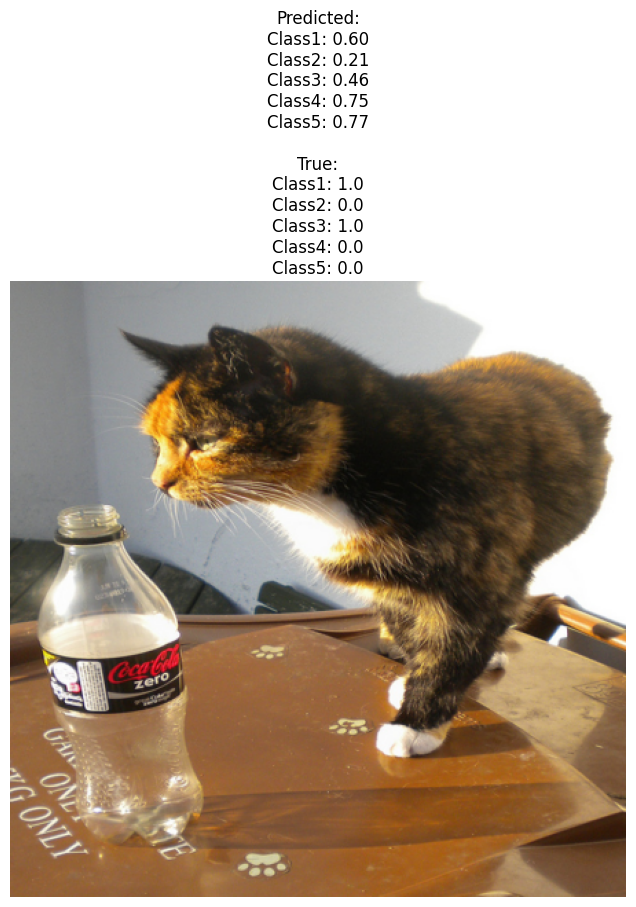

Press Enter to view next image...2


In [ ]:

class_labels = ['Person', 'Cat', 'Dog', 'Car', 'Bicycle']  # Update as per actual class names


def visualize_image_with_labels(image, predictions, labels, class_labels):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")


    predicted_labels = [f"{class_labels[i]}: {pred:.2f}" for i, pred in enumerate(predictions)]
    true_labels = [f"{class_labels[i]}: {label}" for i, label in enumerate(labels)]

    #
    plt.title(f"Predicted:\n" + "\n".join(predicted_labels) + "\n\nTrue:\n" + "\n".join(true_labels))
    plt.show()


with torch.no_grad():
    for images, labels in test_loader:
        # Process image and label
        images, labels = images.to(device), labels.to(device)
        logits, _ = model(images)
        preds = torch.sigmoid(logits).cpu().numpy().squeeze()
        labels = labels.cpu().numpy().squeeze()

        # Convert tensor image back to PIL image for visualization
        image = transforms.ToPILImage()(images[0].cpu())

        # Visualize with predictions and ground truth
        visualize_image_with_labels(image, preds, labels, class_labels)


        input("Press Enter to view next image...")


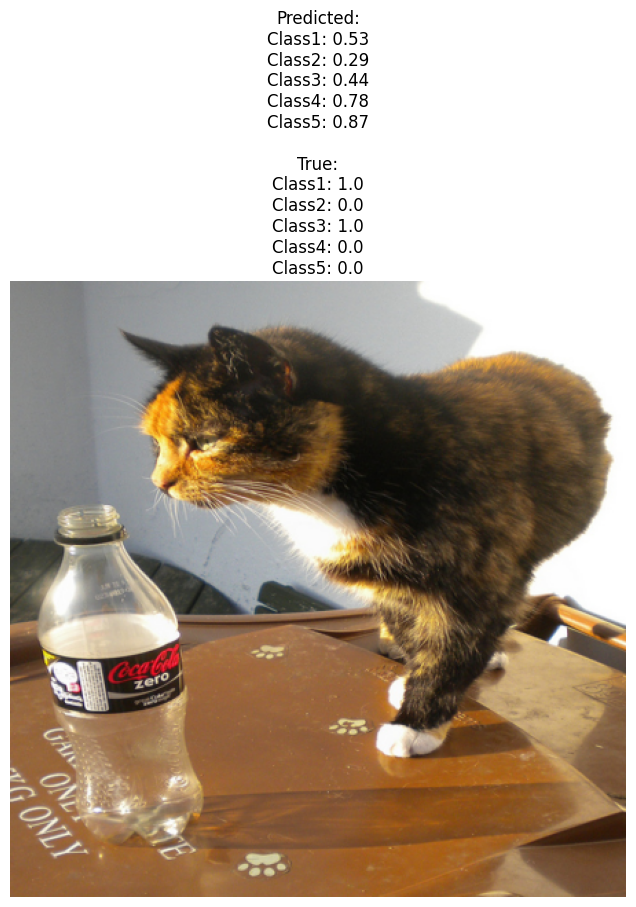

In [ ]:
# Define class labels
class_labels = ['Person', 'Cat', 'Dog', 'Car', 'Bicycle']


def visualize_image_with_labels(image, predictions, labels, class_labels):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")

    # labels
    predicted_labels = [f"{class_labels[i]}: {pred:.2f}" for i, pred in enumerate(predictions)]
    true_labels = [f"{class_labels[i]}: {label}" for i, label in enumerate(labels)]

    plt.title(f"Predicted:\n" + "\n".join(predicted_labels) + "\n\nTrue:\n" + "\n".join(true_labels))
    plt.show()

with torch.no_grad():
    for images, labels in test_loader:
        # Process image and label
        images, labels = images.to(device), labels.to(device)
        logits, _ = model(images)
        preds = torch.sigmoid(logits).cpu().numpy().squeeze()
        labels = labels.cpu().numpy().squeeze()

        image = transforms.ToPILImage()(images[0].cpu())


        visualize_image_with_labels(image, preds, labels, class_labels)

        input("Press Enter to view next image...")


In [ ]:
!pip install torchcam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
